## UEA Project

**Note:** The dataset used here is a cleaned and aggregated version of the original CBECI data  
from the Cambridge Centre for Alternative Finance (CCAF).  
Modified by Joey Lee. Licensed under CC BY-NC-SA 4.0.

In [3]:
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.formula.api as smf
import os

In [4]:
data_path_mining_activity = os.path.join("..", "data", "Mining Activity by Countries.csv")
activity_by_country = pd.read_csv(data_path_mining_activity)
activity_by_country

,date,WB country,% monthly_hashrate PH/s
0,9/1/19 0:00,Mainland China,0.755306
1,9/1/19 0:00,Philippines,0.000010
2,9/1/19 0:00,Turkmenistan,0.000010
3,9/1/19 0:00,Angola,0.000013
4,9/1/19 0:00,Bangladesh,0.000013
...,...,...,...
3699,1/1/22 0:00,Mongolia,0.000408
3700,1/1/22 0:00,Greece,0.000460
3701,1/1/22 0:00,Kuwait,0.000510
3702,1/1/22 0:00,"Egypt, Arab Rep.",0.000174


In [5]:
data_path_elec_consump = os.path.join("..", "data", "Total Bitcoin electricity consumption (monthly).csv")
total_btc_elec_consump = pd.read_csv(data_path_elec_consump)
total_btc_elec_consump

,Average electricity cost assumption: 0.05 USD/kWh,Unnamed: 1,Unnamed: 2
0,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,July 2010,0.0,0.0
2,August 2010,0.0,0.0001
3,September 2010,0.0001,0.0001
4,October 2010,0.0002,0.0003
...,...,...,...
173,November 2024,14.009,642.3845
174,December 2024,15.3901,657.7747
175,January 2025,14.8142,672.5889
176,February 2025,13.5401,686.129


In [6]:
total_btc_elec_consump = total_btc_elec_consump.rename(columns={'Average electricity cost assumption: 0.05 USD/kWh': 'Month',
                                                                'Unnamed: 1': 'Monthly consumption, TWh', 'Unnamed: 2': 'Cumulative consumption, TWh'})
total_btc_elec_consump = total_btc_elec_consump.iloc[1:,:]
total_btc_elec_consump

,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,July 2010,0.0,0.0
2,August 2010,0.0,0.0001
3,September 2010,0.0001,0.0001
4,October 2010,0.0002,0.0003
5,November 2010,0.0003,0.0006
...,...,...,...
173,November 2024,14.009,642.3845
174,December 2024,15.3901,657.7747
175,January 2025,14.8142,672.5889
176,February 2025,13.5401,686.129


In [7]:
total_btc_elec_consump["Month"] = pd.to_datetime(total_btc_elec_consump["Month"], format="%B %Y").dt.strftime("%Y-%m")
total_btc_elec_consump

,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,2010-07,0.0,0.0
2,2010-08,0.0,0.0001
3,2010-09,0.0001,0.0001
4,2010-10,0.0002,0.0003
5,2010-11,0.0003,0.0006
...,...,...,...
173,2024-11,14.009,642.3845
174,2024-12,15.3901,657.7747
175,2025-01,14.8142,672.5889
176,2025-02,13.5401,686.129


In [8]:
activity_by_country["date"] = pd.to_datetime(activity_by_country["date"], format="%m/%d/%y %H:%M")

# Convert to "YYYY-MM" format
activity_by_country["date"] = activity_by_country["date"].dt.strftime("%Y-%m")

print(activity_by_country.head())


      date      WB country  % monthly_hashrate PH/s
0  2019-09  Mainland China                 0.755306
1  2019-09     Philippines                 0.000010
2  2019-09    Turkmenistan                 0.000010
3  2019-09          Angola                 0.000013
4  2019-09      Bangladesh                 0.000013


In [9]:
activity_by_country.head()

,date,WB country,% monthly_hashrate PH/s
0,2019-09,Mainland China,0.755306
1,2019-09,Philippines,0.000010
2,2019-09,Turkmenistan,0.000010
3,2019-09,Angola,0.000013
4,2019-09,Bangladesh,0.000013


In [10]:
total_btc_elec_consump

,Month,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,2010-07,0.0,0.0
2,2010-08,0.0,0.0001
3,2010-09,0.0001,0.0001
4,2010-10,0.0002,0.0003
5,2010-11,0.0003,0.0006
...,...,...,...
173,2024-11,14.009,642.3845
174,2024-12,15.3901,657.7747
175,2025-01,14.8142,672.5889
176,2025-02,13.5401,686.129


In [11]:
total_btc_elec_consump = total_btc_elec_consump.rename(columns={'Month': 'date'})
total_btc_elec_consump

,date,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,2010-07,0.0,0.0
2,2010-08,0.0,0.0001
3,2010-09,0.0001,0.0001
4,2010-10,0.0002,0.0003
5,2010-11,0.0003,0.0006
...,...,...,...
173,2024-11,14.009,642.3845
174,2024-12,15.3901,657.7747
175,2025-01,14.8142,672.5889
176,2025-02,13.5401,686.129


In [12]:
activity_by_country

,date,WB country,% monthly_hashrate PH/s
0,2019-09,Mainland China,0.755306
1,2019-09,Philippines,0.000010
2,2019-09,Turkmenistan,0.000010
3,2019-09,Angola,0.000013
4,2019-09,Bangladesh,0.000013
...,...,...,...
3699,2022-01,Mongolia,0.000408
3700,2022-01,Greece,0.000460
3701,2022-01,Kuwait,0.000510
3702,2022-01,"Egypt, Arab Rep.",0.000174


In [13]:
total_btc_elec_consump

,date,"Monthly consumption, TWh","Cumulative consumption, TWh"
1,2010-07,0.0,0.0
2,2010-08,0.0,0.0001
3,2010-09,0.0001,0.0001
4,2010-10,0.0002,0.0003
5,2010-11,0.0003,0.0006
...,...,...,...
173,2024-11,14.009,642.3845
174,2024-12,15.3901,657.7747
175,2025-01,14.8142,672.5889
176,2025-02,13.5401,686.129


In [14]:
merged_df = pd.merge(activity_by_country, total_btc_elec_consump, on='date', how='left')
merged_df.head()

,date,WB country,% monthly_hashrate PH/s,"Monthly consumption, TWh","Cumulative consumption, TWh"
0,2019-09,Mainland China,0.755306,5.9552,109.0468
1,2019-09,Philippines,0.000010,5.9552,109.0468
2,2019-09,Turkmenistan,0.000010,5.9552,109.0468
3,2019-09,Angola,0.000013,5.9552,109.0468
4,2019-09,Bangladesh,0.000013,5.9552,109.0468


In [15]:
merged_df['Monthly consumption, TWh'] = pd.to_numeric(merged_df['Monthly consumption, TWh'], errors='coerce').astype('float')

In [16]:
merged_df = merged_df.drop('Cumulative consumption, TWh', axis=1)

In [17]:
merged_df['Country Electricity Usage, TWh'] = merged_df['Monthly consumption, TWh'] * merged_df['% monthly_hashrate PH/s']
merged_df.columns = merged_df.columns.str.replace('\xa0', ' ').str.strip()
merged_df

,date,WB country,% monthly_hashrate PH/s,"Monthly consumption, TWh","Country Electricity Usage, TWh"
0,2019-09,Mainland China,0.755306,5.9552,4.497997
1,2019-09,Philippines,0.000010,5.9552,0.000060
2,2019-09,Turkmenistan,0.000010,5.9552,0.000061
3,2019-09,Angola,0.000013,5.9552,0.000077
4,2019-09,Bangladesh,0.000013,5.9552,0.000080
...,...,...,...,...,...
3699,2022-01,Mongolia,0.000408,8.6650,0.003532
3700,2022-01,Greece,0.000460,8.6650,0.003987
3701,2022-01,Kuwait,0.000510,8.6650,0.004419
3702,2022-01,"Egypt, Arab Rep.",0.000174,8.6650,0.001511


In [18]:
merged_df = merged_df.rename(columns={'WB country': 'wb_country', 
                                      '% monthly_hashrate PH/s': 'percent_monthly_hashrate_PHs', 
                                      'Monthly consumption, TWh': 'btc_monthly_consumption_TWh',
                                      'Country Electricity Usage, TWh': 'btc_country_electricity_usage_TWh'})

In [19]:
merged_df['wb_country'].unique()

array(['Mainland China', 'Philippines', 'Turkmenistan', 'Angola',
       'Bangladesh', 'Ghana', 'Croatia', 'Slovenia', 'Seychelles',
       'New Zealand', 'Iraq', 'Qatar', 'Costa Rica', 'Denmark', 'Israel',
       'Japan', 'Saudi Arabia', 'Belgium', 'Andorra', 'Montenegro',
       'Finland', 'Lebanon', 'Syria', 'Vietnam', 'Albania', 'Myanmar',
       'Zimbabwe', 'Slovakia', 'Argentina', 'Australia', 'Bahrain',
       'Jordan', 'Tajikistan', 'Nepal', 'Jamaica', 'Cambodia', 'Kenya',
       "Cote D'Ivoire", 'Mozambique', 'Cyprus',
       'Democratic Republic of the Congo', 'British Virgin Islands',
       'Nicaragua', 'Tunisia', 'Sri Lanka', 'Lesotho', 'Ecuador',
       'Afghanistan', 'Curacao', 'Bolivia', 'Luxembourg', 'Uruguay',
       'Morocco', 'Cameroon', 'Malawi', 'Panama', 'Chile', 'Pakistan',
       'Nigeria', 'Uganda', 'Algeria', 'Guatemala', 'Sweden', 'Italy',
       'Ireland', 'Hungary', 'Romania', 'Kuwait', 'United Arab Emirates',
       'Trinidad and Tobago', 'Taiwan', 'Brune

In [20]:
groups = merged_df[merged_df['wb_country'].isin(['United States', 'Russian Federation', 'Kazakhstan'])].reset_index()
groups.head()

,index,date,wb_country,percent_monthly_hashrate_PHs,btc_monthly_consumption_TWh,btc_country_electricity_usage_TWh
0,90,2019-09,Kazakhstan,0.014209,5.9552,0.084617
1,93,2019-09,United States,0.040609,5.9552,0.241832
2,97,2019-09,Russian Federation,0.059285,5.9552,0.353051
3,214,2019-10,Kazakhstan,0.013687,6.0206,0.082404
4,218,2019-10,United States,0.055768,6.0206,0.335754


In [21]:
# Check total number of NaN values in the DataFrame
print(groups.isna().sum().sum())

0


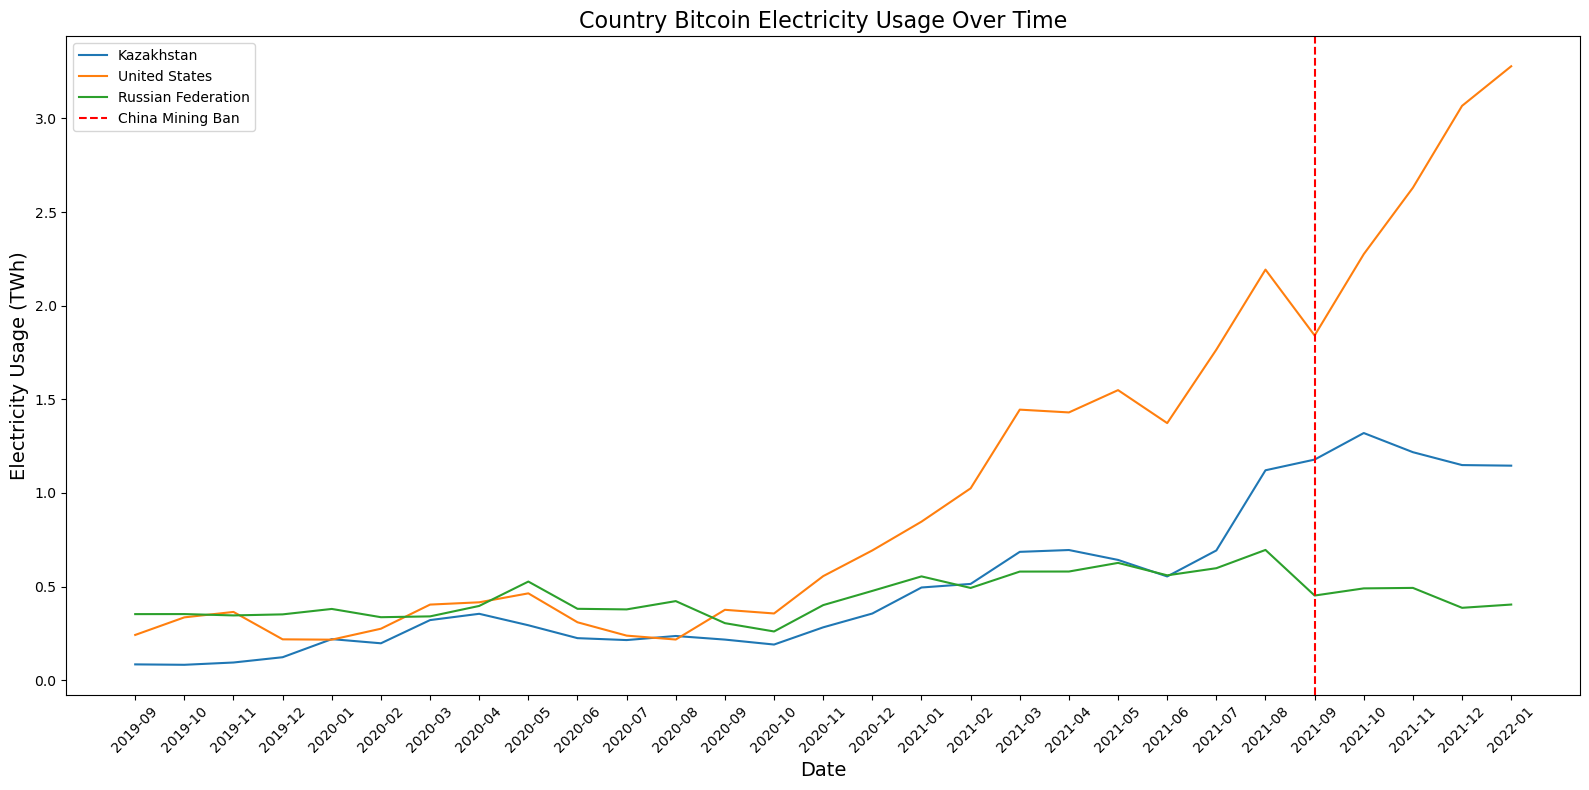

In [22]:


# Ensure that 'date' column is in string format, or use its index position for the x-axis
plt.figure(figsize=(16, 8))
sns.lineplot(data=groups, x='date', y='btc_country_electricity_usage_TWh', hue='wb_country')

# Add a vertical dashed line at '2021-09'
plt.axvline(x='2021-09', color='red', linestyle='--', label='China Mining Ban')

# Customizing the plot
plt.xticks(rotation=45)
plt.title("Country Bitcoin Electricity Usage Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Electricity Usage (TWh)", fontsize=14)

# Adding a legend for the vertical line
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Convert to datetime
groups['date'] = pd.to_datetime(groups['date'], format='%Y-%m')

# Treatment variable: 1 if the country is US, 0 for other countries
groups['treatment'] = np.where(groups['wb_country'].isin(['United States']), 1, 0)

# Post-treatment variable: 1 if the date is after May 2021, 0 if it's before
groups['post'] = np.where(groups['date'] >= '2021-05-01', 1, 0)

# Interaction term for DiD analysis (Treatment * Post-treatment)
groups['treatment_post'] = groups['treatment'] * groups['post']

In [24]:
model = smf.ols('btc_country_electricity_usage_TWh ~ treatment + post + treatment_post', data=groups).fit()

# View the summary of the regression results
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     btc_country_electricity_usage_TWh   R-squared:                       0.745
Model:                                           OLS   Adj. R-squared:                  0.736
Method:                                Least Squares   F-statistic:                     80.87
Date:                               Thu, 23 Oct 2025   Prob (F-statistic):           1.47e-24
Time:                                       11:29:12   Log-Likelihood:                -24.630
No. Observations:                                 87   AIC:                             57.26
Df Residuals:                                     83   BIC:                             67.12
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                     coef    std err          t      P>|t|  